In [1]:
import scipy
import theano

import numpy as np
import matplotlib.pyplot as plt

import keras.engine  as KE
import keras.backend as K

from keras import models
from keras import optimizers
from keras import regularizers
from keras import layers
from keras import utils
from keras import metrics
from keras import activations


from complexnn.conv        import ComplexConv1D
from complexnn.dense       import ComplexDense
from complexnn.bn          import ComplexBN, ComplexBatchNormalization
from complexnn.pool        import SpectralPooling1D
from complexnn.init        import *
from complexnn.fft         import FFT, IFFT
from complexnn.utils       import *
from complexnn.loss        import *
from complexnn.activations import *
from complexnn.models      import *

from datasets.chaos   import *
from datasets.predict import *
from datasets.utils   import *


from sklearn.model_selection import train_test_split

Using Theano backend.


In [2]:
M, N = 1024 + 40000, 1024

dataset = IkedaMap(M, N, z0=0.5 + 0 * 1j, A=1, B=0.9, K=-6, C=0.4, SNRdB=-1)
X, y = dataset.generate()
S = dataset.signal_n

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, shuffle=False)

In [3]:
model = WaveletNet()
model.load("models/wavelet_ikeda.json", "models/wavelet_ikeda.h5")

In [4]:
po = model.recursive_predict(series=X_train[0], steps=40000, use_history=False)

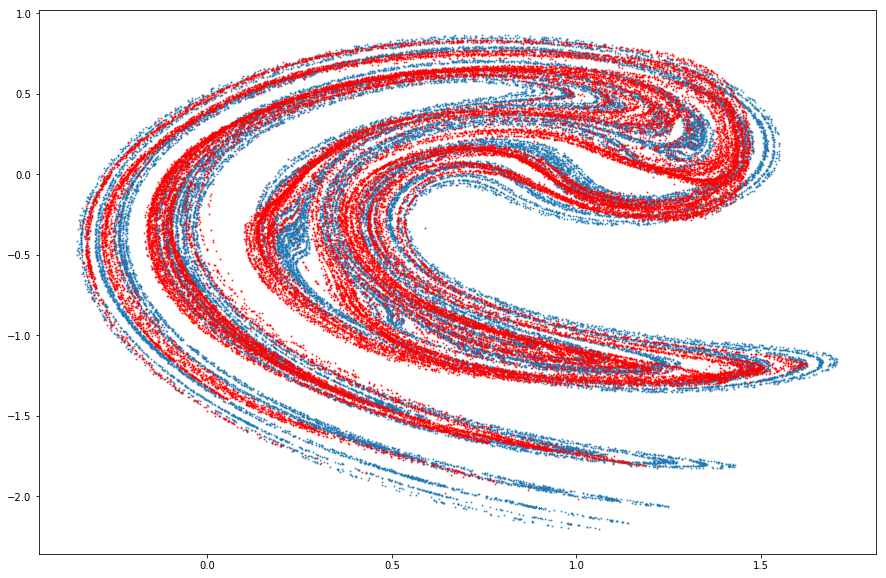

In [5]:
plt.figure(figsize=(15, 10))
plt.scatter(np.real(S), np.imag(S), s=1, alpha=0.7)
plt.scatter(po[:, 0], po[:, 1], s=1, alpha=0.7, c='r')
plt.show()